# Librerias importadas

In [1]:
import pyarrow as pa
import pandas as pd
import pyarrow.parquet as pap
import numpy as nu
import matplotlib.pyplot as plt

# Cargado de datos

In [2]:
precdf = pd.read_parquet ("C:/Users/Jatzua Chacon/Documents/Proyecto No Country/Data sets/precio_internacional_del_crudo(por_barril).parquet")
prodf = pd.read_csv ("C:/Users/Jatzua Chacon/Documents/Proyecto No Country/Data sets/Produccion y Consumo anual de petroleo.csv")

# Analisis estadistico

## Analisis de la produccion anual de petroleo (1990-2023)

In [3]:
#Identifico las columnas que utilizare para el grafico de barras de la produccion anula de petroleo crudo.
prod = prodf['Produccion']
years = prodf['Ano']

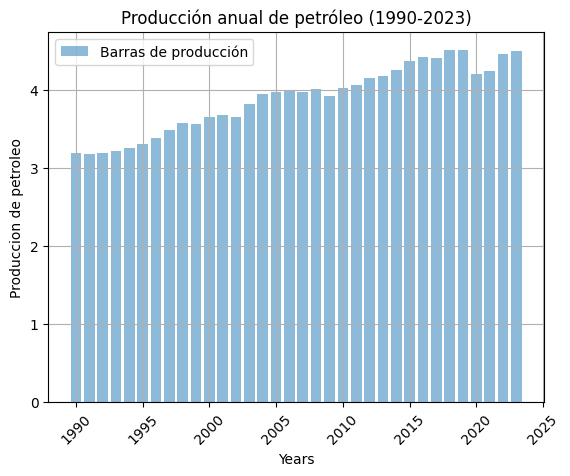

<Figure size 1200x800 with 0 Axes>

In [4]:
#Grafico la evolucion anual de la produccion de pteroleo crudo en un grafico de barras.
fig, ax = plt.subplots()
##ax.plot(years, prod, marker='o', linestyle='-', label="Produccion anual de petroleo")
ax.bar(years, prod, alpha=0.5, label="Barras de producción")

plt.xlabel("Years")
plt.ylabel("Produccion de petroleo")
plt.title("Producción anual de petróleo (1990-2023)")

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.figure(figsize=(12,8))
plt.tight_layout()
plt.show()

## Analisis del consumo anual de petroleo (1990-2023)

In [5]:
#Identifico las columnas que utilizare para el grafico de barras de la produccion anula de petroleo crudo.
cons = prodf['Consumo']
years = prodf['Ano']

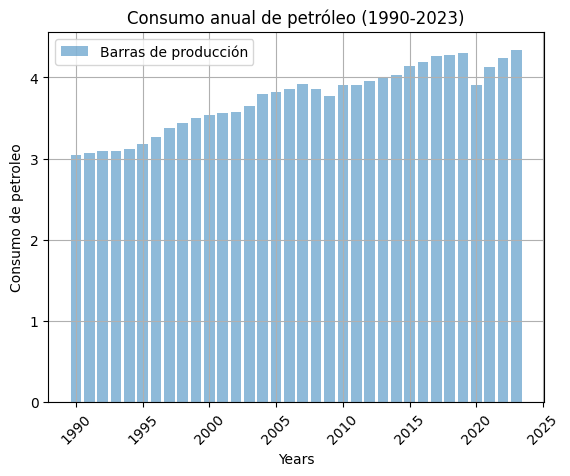

<Figure size 1200x600 with 0 Axes>

In [6]:
#Grafico la evolucion anual de la produccion de pteroleo crudo en un grafico de barras.
fig, ax = plt.subplots()
##ax.plot(years, cons, marker='o', linestyle='-', label="Consumo anual de petroleo")
ax.bar(years, cons, alpha=0.5, label="Barras de producción")

plt.xlabel("Years")
plt.ylabel("Consumo de petroleo")
plt.title("Consumo anual de petróleo (1990-2023)")

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

## Analisis del precio del petroleo (1983-2024)

In [7]:
#Identifico las columnas que utilizare para el grafico de barras de la produccion anula de petroleo crudo.
precio = precdf['Precio']
fecha = precdf['Fecha']

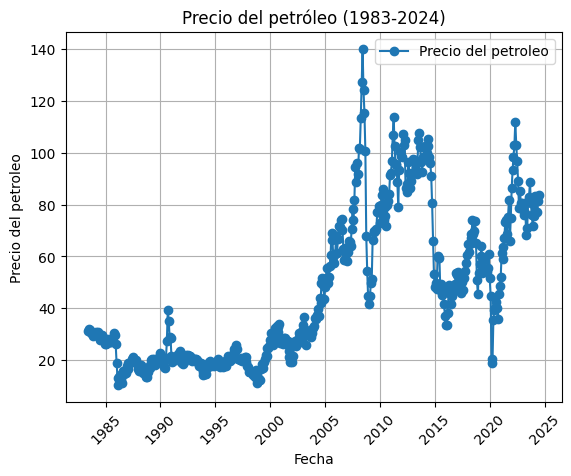

<Figure size 1200x600 with 0 Axes>

In [8]:
#Grafico la evolucion anual de la produccion de pteroleo crudo en un grafico de barras.
fig, ax = plt.subplots()
ax.plot(fecha, precio, marker='o', linestyle='-', label="Precio del petroleo")

plt.xlabel("Fecha")
plt.ylabel("Precio del petroleo")
plt.title("Precio del petróleo (1983-2024)")

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

# Analisis de variables conjuntas 

In [9]:
#Calculo el promedio del precio del petroleo por cada ano, a partir de 1990.
bloque = 12
promedio = []  
columna = 'Precio'

for i in range(79, 487, bloque):
    block = precdf[i:i + bloque]
    average = block[columna].mean()
    promedio.append(average) 

In [10]:
#Identifico cada una de las variables que utilizaremos para el grafico de dispersion. 
var1 = prodf['Consumo'] # Consumo anual de petroleo crudo a partir de 1990.
var2 = promedio # Precio promedio anual del barril petroleo crudo a partir de 1990.
var3 = prodf ['Produccion'] # Produccion anual de petroleo crudo a partir de 1990.

In [11]:
#Convierto las variables de Consumo y Produccion a formato numerico, para el calculo de la recta de minimos cuadrados.
var1_num = pd.to_numeric(var1, errors='coerce')
var3_num = pd.to_numeric(var3, errors='coerce')

## Analisis conjunto de las variables Consumo de Petroleo y Precio del Petroleo

In [12]:
#Calculo de la recta de minimos cuadrados de las variables Consumo anual y Precio promedio anual.
med_x = var1_num.mean()
med_y = nu.mean(var2)
covarianza = nu.cov(var1_num, var2)[0,1]
m=covarianza / nu.var(var1_num)
b=med_y- m * med_x
x_reg = nu.linspace(min(var1_num), max(var1_num), 100)
y_reg = m *x_reg + b

r_squared = nu.corrcoef(var1_num, var2)[0, 1] **2
r = nu.corrcoef(var1_num, var2)[0, 1]

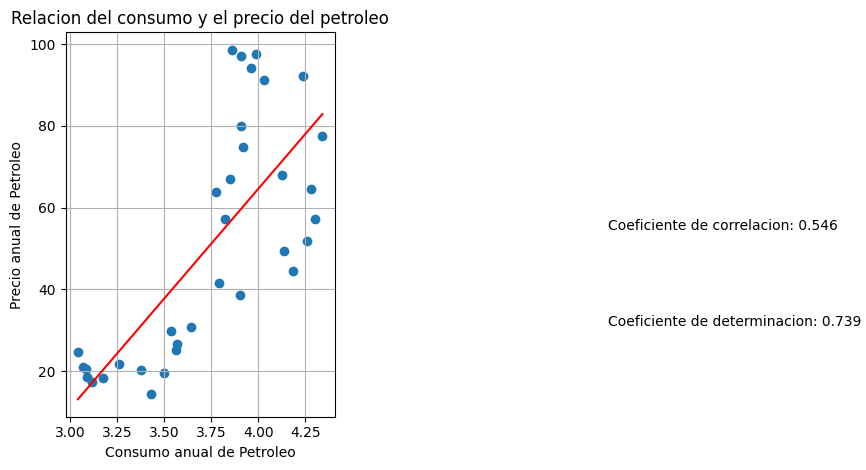

In [13]:
#Grafico el el diagrama de dispersion con la recta de minimos cuadrados.
plt.scatter(var1, var2)
plt.plot(x_reg, y_reg, color="red")
plt.xlabel('Consumo anual de Petroleo')
plt.ylabel('Precio anual de Petroleo')
plt.title('Relacion del consumo y el precio del petroleo')

r_squared_str = f"Coeficiente de correlacion: {r_squared:.3f}"  # Formatear con 3 decimales
correlation_coefficiente_str = f"Coeficiente de determinacion: {r:.3f}"

plt.annotate(correlation_coefficiente_str, xy=(0.95, 0.3), xycoords='figure fraction', fontsize=10)
plt.annotate(r_squared_str, xy=(0.95, 0.5), xycoords='figure fraction', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

## Analisis conjunto de las variables Produccion de Petroleo y Precio del Petroleo

In [14]:
#Calculo de la recta de minimos cuadrados, el coeficiente de correlacion y coeficiente de determinacion de las variables Produccion anual y Precio promedio anual.
med_x = var3_num.mean()
med_y = nu.mean(var2)
covarianza = nu.cov(var3_num, var2)[0,1]
m=covarianza / nu.var(var3_num)
b=med_y- m * med_x
x_reg = nu.linspace(min(var3_num), max(var3_num), 100)
y_reg = m *x_reg + b

r_squared1 = nu.corrcoef(var3_num, var2)[0, 1] ** 2
r1 = nu.corrcoef(var3_num, var2)[0, 1]

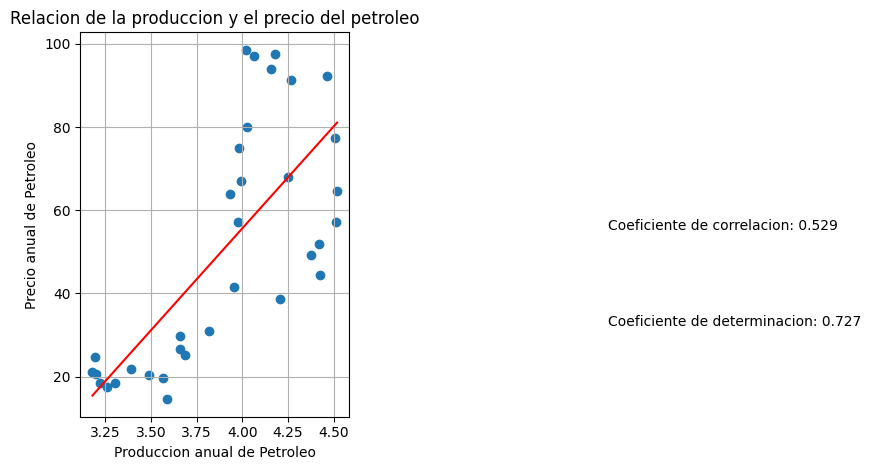

In [15]:
#Grafico el el diagrama de dispersion con la recta de minimos cuadrados.
plt.scatter(var3, var2)
plt.plot(x_reg, y_reg, color="red")
plt.xlabel('Produccion anual de Petroleo')
plt.ylabel('Precio anual de Petroleo')
plt.title('Relacion de la produccion y el precio del petroleo')

r_squared_str1 = f"Coeficiente de correlacion: {r_squared1:.3f}" 
det_coefficiente_str1 = f"Coeficiente de determinacion: {r1:.3f}"

plt.annotate(det_coefficiente_str1, xy=(0.95, 0.3), xycoords='figure fraction', fontsize=10)
plt.annotate(r_squared_str1, xy=(0.95, 0.5), xycoords='figure fraction', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis conjunto de las variables Consumo de Petroleo y Produccion de Petroleo

In [16]:
#Calculo de la recta de minimos cuadrados de las variables Produccion anual y Consumo anual.
med_x = var1_num.mean()
med_y = nu.mean(var3)
covarianza = nu.cov(var1_num, var3_num)[0,1]
m=covarianza / nu.var(var1_num)
b=med_y- m * med_x
x_reg = nu.linspace(min(var1_num), max(var1_num), 100)
y_reg = m *x_reg + b

r_squared2 = nu.corrcoef(var1_num, var3_num)[0, 1] ** 2
r3 = nu.corrcoef(var1_num, var3_num)[0, 1]

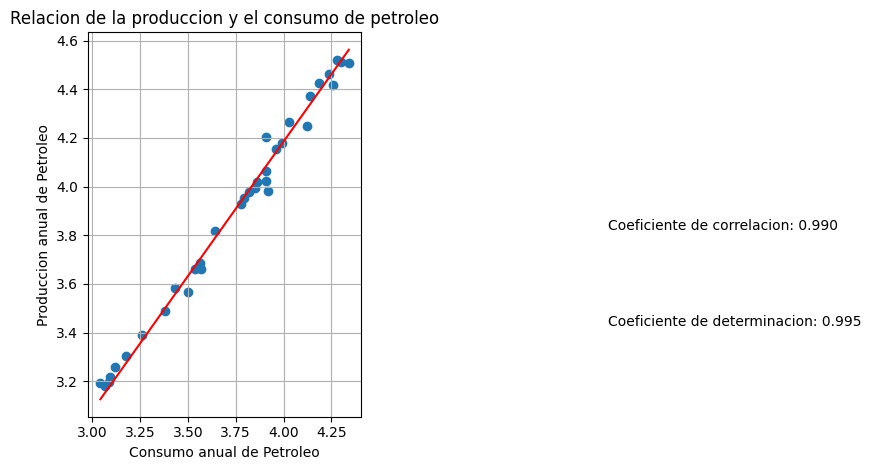

In [30]:
#Grafico el el diagrama de dispersion con la recta de minimos cuadrados.
plt.scatter(var1, var3)
plt.plot(x_reg, y_reg, color="red")
plt.xlabel('Consumo anual de Petroleo')
plt.ylabel('Produccion anual de Petroleo')
plt.title('Relacion de la produccion y el consumo de petroleo')

r_squared_str2 = f"Coeficiente de correlacion: {r_squared2:.3f}" 
det_coefficiente_str2 = f"Coeficiente de determinacion: {r3:.3f}"

plt.annotate(det_coefficiente_str2, xy=(0.95, 0.3), xycoords='figure fraction', fontsize=10)
plt.annotate(r_squared_str2, xy=(0.95, 0.5), xycoords='figure fraction', fontsize=10)


plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones finales